In [139]:
# I have made the assignment about the comparison of COVID-19 Cases with India And Iran

In [11]:
 # importing the required libraries
import pandas as pd
 
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
 
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [12]:
 # for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [13]:
 # get data
 
# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [14]:
 # find the table
# ==============
# our target table is the last table in the page
 
# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)
 
# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)
 
# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)
 
# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [15]:
 # get the table contents
# ======================
 
# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []
 
# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)
 
# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [16]:
 # save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         
 
# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)
 
# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,50,50,0,100
1,Andhra Pradesh,8071,6988,193,15252
2,Arunachal Pradesh,128,66,1,195
3,Assam,2719,5851,12,8582
4,Bihar,2233,7946,70,10249
5,Chandigarh,73,367,6,446
6,Chhattisgarh,623,2303,14,2940
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215
8,Delhi,27007,59992,2803,89802
9,Goa,713,670,4,1387


In [17]:
 # date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 
 
# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')
 
# df_India.head(36)

In [18]:
 # remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [19]:
 # latitude and longitude information
# ==================================
 
# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telangana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadra and Nagar Haveli and Daman and Diu' : 20.1809, 'Sikkim': 27.5330}
 
# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telangana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadra and Nagar Haveli and Daman and Diu' : 73.0169, 'Sikkim': 88.5122}
 
# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)
 
# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)
 
df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,50,50,0,100,2020-07-03,11.7401,92.6586
1,Andhra Pradesh,8071,6988,193,15252,2020-07-03,15.9129,79.7400
2,Arunachal Pradesh,128,66,1,195,2020-07-03,28.2180,94.7278
3,Assam,2719,5851,12,8582,2020-07-03,26.2006,92.9376
4,Bihar,2233,7946,70,10249,2020-07-03,25.0961,85.3131
5,Chandigarh,73,367,6,446,2020-07-03,30.7333,76.7794
6,Chhattisgarh,623,2303,14,2940,2020-07-03,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215,2020-07-03,20.1809,73.0169
8,Delhi,27007,59992,2803,89802,2020-07-03,28.7041,77.1025
9,Goa,713,670,4,1387,2020-07-03,15.2993,74.1240


In [20]:
 
# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated*' :'Cured/Discharged', 
                                      'Total Confirmed cases*': 'Confirmed', 
                                      'Active Cases*': 'Active'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
 
df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [21]:
 # unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [22]:
 # number of missing values 
df_India.isna().sum()

State/UnionTerritory    0
Active                  0
Cured                   0
Deaths                  0
Confirmed               0
Date                    0
Latitude                0
Longitude               0
dtype: int64

In [23]:
 # number of unique values 
df_India.nunique()

State/UnionTerritory    35
Active                  35
Cured                   35
Deaths                  26
Confirmed               35
Date                     1
Latitude                35
Longitude               31
dtype: int64

In [24]:
 # saving data
# ===========
 
# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'
 
# location for saving the file
file_loc = '/content/'
 
# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)
 
# df_India.head(36)

In [25]:
 # fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [26]:
 # rename state/UT names
df_India['State/UnionTerritory'].replace('Chhattisgarh', 'Chattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Puducherry', 'Pondicherry', inplace=True)

In [27]:
 df_India.head(36)

,State/UnionTerritory,Active,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,50,50,0,100,2020-07-03,11.7401,92.6586
1,Andhra Pradesh,8071,6988,193,15252,2020-07-03,15.9129,79.7400
2,Arunachal Pradesh,128,66,1,195,2020-07-03,28.2180,94.7278
3,Assam,2719,5851,12,8582,2020-07-03,26.2006,92.9376
4,Bihar,2233,7946,70,10249,2020-07-03,25.0961,85.3131
5,Chandigarh,73,367,6,446,2020-07-03,30.7333,76.7794
6,Chattisgarh,623,2303,14,2940,2020-07-03,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215,2020-07-03,20.1809,73.0169
8,Delhi,27007,59992,2803,89802,2020-07-03,28.7041,77.1025
9,Goa,713,670,4,1387,2020-07-03,15.2993,74.1240


In [28]:
 # complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   State/UnionTerritory  35 non-null     object        
 1   Active                35 non-null     object        
 2   Cured                 35 non-null     object        
 3   Deaths                35 non-null     object        
 4   Confirmed             35 non-null     object        
 5   Date                  35 non-null     datetime64[ns]
 6   Latitude              35 non-null     float64       
 7   Longitude             35 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [29]:
 # saving data
# ===========
 
# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'
 
# location for saving the file
file_loc = '/content/'
 
# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [31]:
 #Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/2020_07_03 - COVID-19_India_preprocessed.csv')
df_india = df.copy()
df

,State/UnionTerritory,Active,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,50,50,0,100,2020-07-03,11.7401,92.6586
1,Andhra Pradesh,8071,6988,193,15252,2020-07-03,15.9129,79.7400
2,Arunachal Pradesh,128,66,1,195,2020-07-03,28.2180,94.7278
3,Assam,2719,5851,12,8582,2020-07-03,26.2006,92.9376
4,Bihar,2233,7946,70,10249,2020-07-03,25.0961,85.3131
5,Chandigarh,73,367,6,446,2020-07-03,30.7333,76.7794
6,Chattisgarh,623,2303,14,2940,2020-07-03,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215,2020-07-03,20.1809,73.0169
8,Delhi,27007,59992,2803,89802,2020-07-03,28.7041,77.1025
9,Goa,713,670,4,1387,2020-07-03,15.2993,74.1240


In [33]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [34]:
 total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (02nd July, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (02nd July, 2020): 597809


In [35]:
 #Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,50,50,0,100
1,Andhra Pradesh,8071,6988,193,15252
2,Arunachal Pradesh,128,66,1,195
3,Assam,2719,5851,12,8582
4,Bihar,2233,7946,70,10249
5,Chandigarh,73,367,6,446
6,Chattisgarh,623,2303,14,2940
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215
8,Delhi,27007,59992,2803,89802
9,Goa,713,670,4,1387


In [36]:
 today = now.strftime("%Y_%m_%d")
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_07_03 are:  359860
Total people who were detected COVID+ve as of 2020_07_03 are:  597809
Total people who died due to COVID19 as of 2020_07_03 are:  17834
Total active COVID19 cases as of 2020_07_03 are:  220115


In [37]:
 import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
 
#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,180298,8053,93154,79091,4.470000,51.670000
29,Tamil Nadu,94049,1264,52926,39859,1.340000,56.270000
8,Delhi,89802,2803,59992,27007,3.120000,66.800000
10,Gujarat,33232,1867,24030,7335,5.620000,72.310000
32,Uttar Pradesh,24056,718,16629,6709,2.980000,69.130000
34,West Bengal,19170,683,12528,5959,3.560000,65.350000
27,Rajasthan,18312,421,14574,3317,2.300000,79.590000
30,Telangana,17357,267,8082,9008,1.540000,46.560000
15,Karnataka,16514,253,8063,8198,1.530000,48.830000
1,Andhra Pradesh,15252,193,6988,8071,1.270000,45.820000


In [71]:
 age_details = pd.read_csv('/content/AgeGroupDetails_i0e5l.csv')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/population_india_census2011.csv')

In [39]:
 india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [40]:
 confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

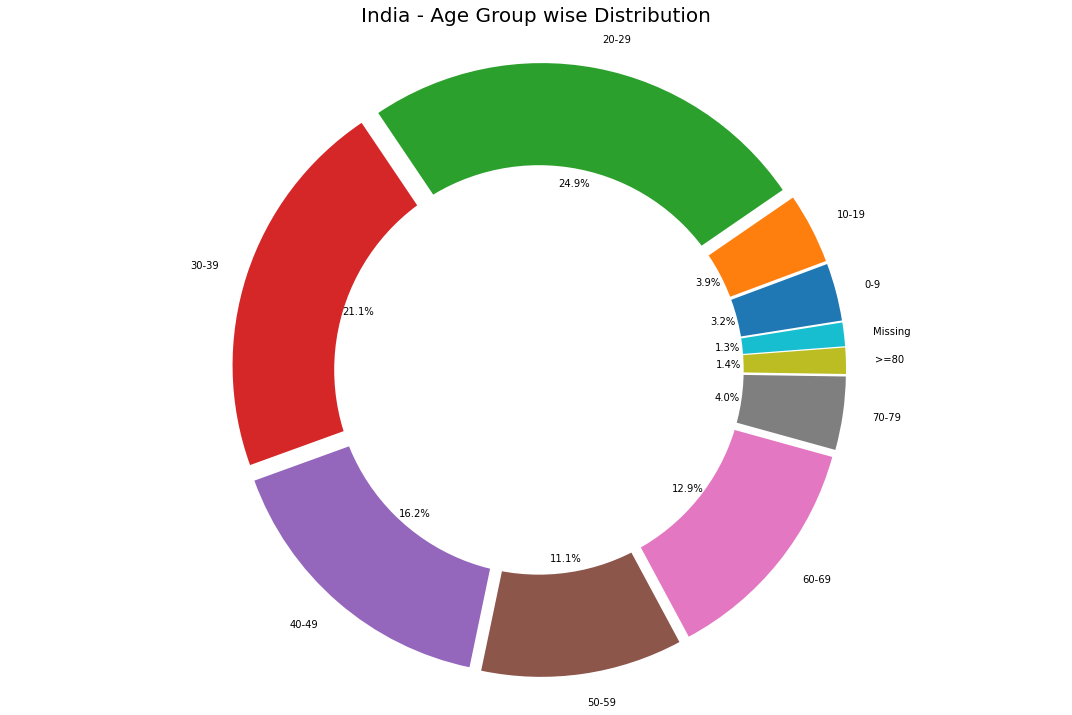

In [41]:
 labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])
 
explode = []
 
for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [42]:
 dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

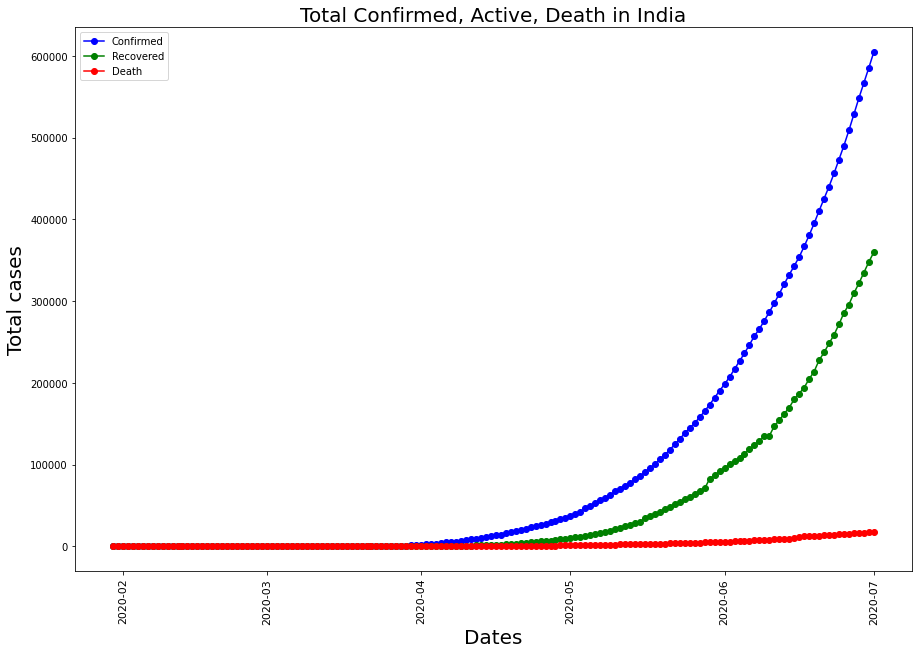

In [43]:
 tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()
 
k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 
 
k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 
 
k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 
 
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
 
ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

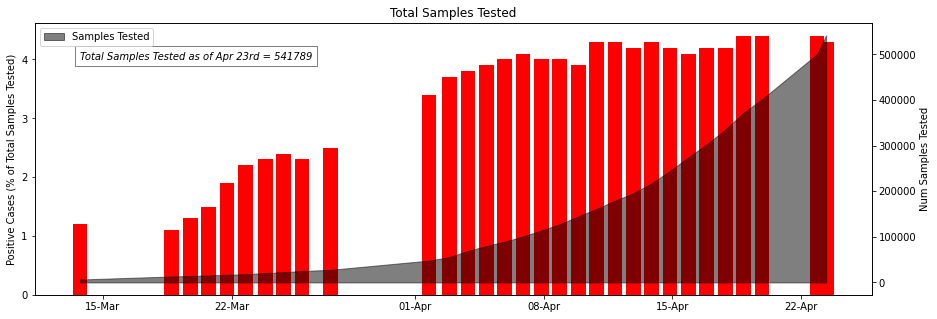

In [44]:
 import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)
 
fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})
 
ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');
 
plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()

In [45]:
 import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')
 
# get contents from the response
content = response.content
 
# parse the json file
parsed = json.loads(content)
 
# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [46]:
 # save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])
 
# first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d6ua4
2675,,,,,948,,395,,,96906000,17283,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.69%,4839,27,4.84,976040,6937,95383,1606262,468906,,28/06/2020,NaN
2676,,,,,948,,395,,,96906000,17907,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.74%,4937,27,4.94,983040,6931,95944,1618262,478419,,29/06/2020,NaN
2677,,,,,948,,395,,,96906000,18559,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.80%,5036,26,5.04,991040,6795,96162,1628262,488038,,30/06/2020,NaN
2678,,,,,948,,395,,,96906000,19170,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.85%,5135,26,5.13,1001040,6668,96702,1638262,497596,,01/07/2020,NaN
2679,,,,,948,,395,,,96906000,19819,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.90%,5242,26,5.24,1009040,6449,97290,1648262,508001,,02/07/2020,NaN


In [47]:
 # fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [48]:
 # save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)

In [49]:
 state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',  'testsperpositivecase', 'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [50]:
 state_test_cases.head(36)

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
5,2020-01-05,Arunachal Pradesh,724,1504000,0.28%,362,0.48,
6,2020-01-05,Assam,,34293000,,,0.00,
7,2020-01-05,Bihar,24118,119520000,1.93%,52,0.20,2156
8,2020-01-05,Chandigarh,1252,1179000,7.03%,14,1.06,
9,2020-01-05,Chhattisgarh,18039,28724000,0.24%,420,0.63,575


In [51]:
 state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',    'testsperpositivecase', 'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [52]:
 state_test_cases = state_test_cases.apply(pd.to_numeric)

In [53]:
 state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  35
testsperpositivecase                21
testsperthousand                    32
totalpeoplecurrentlyinquarantine    26
dtype: int64

In [54]:
 state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Maharashtra,995343,122153000,9.070000,9,8.380000,nan
Haryana,99987,28672000,5.770000,87,9.410000,46030.000000
Jharkhand,99931,37403000,1.750000,99,3.900000,99641.000000
Kerala,99692,35125000,3.380000,83,6.800000,992.000000
Madhya Pradesh,99677,82232000,9.770000,27,4.530000,nan
Bihar,99108,119520000,5.180000,95,1.970000,802.000000
Chhattisgarh,98603,28724000,1.800000,95,5.700000,924.000000
Uttar Pradesh,98300,224979000,5.290000,41,3.370000,9911.000000
Telangana,98153,37220000,6.630000,8,2.490000,nan


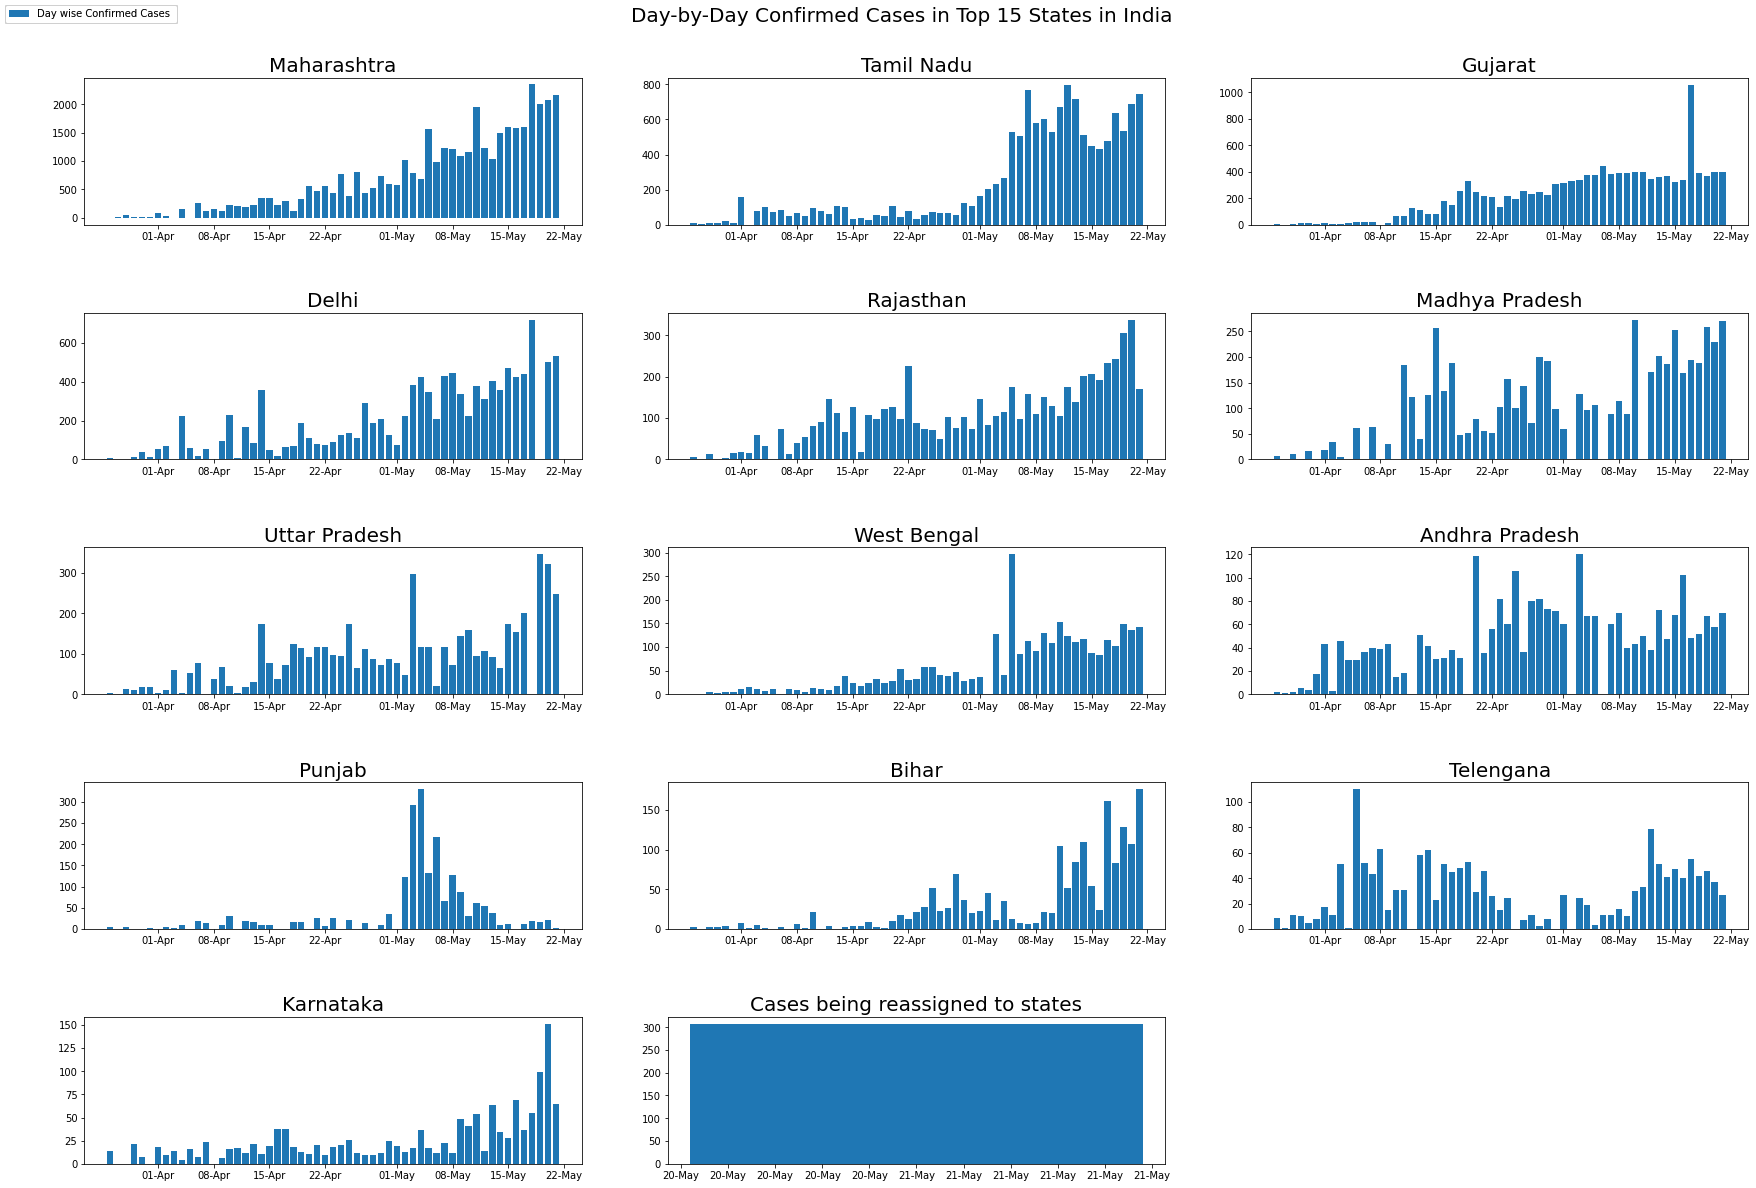

In [58]:
 all_state = list(df_India['State/UnionTerritory'].unique())
 
latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])
 
states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}
 
for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    # states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

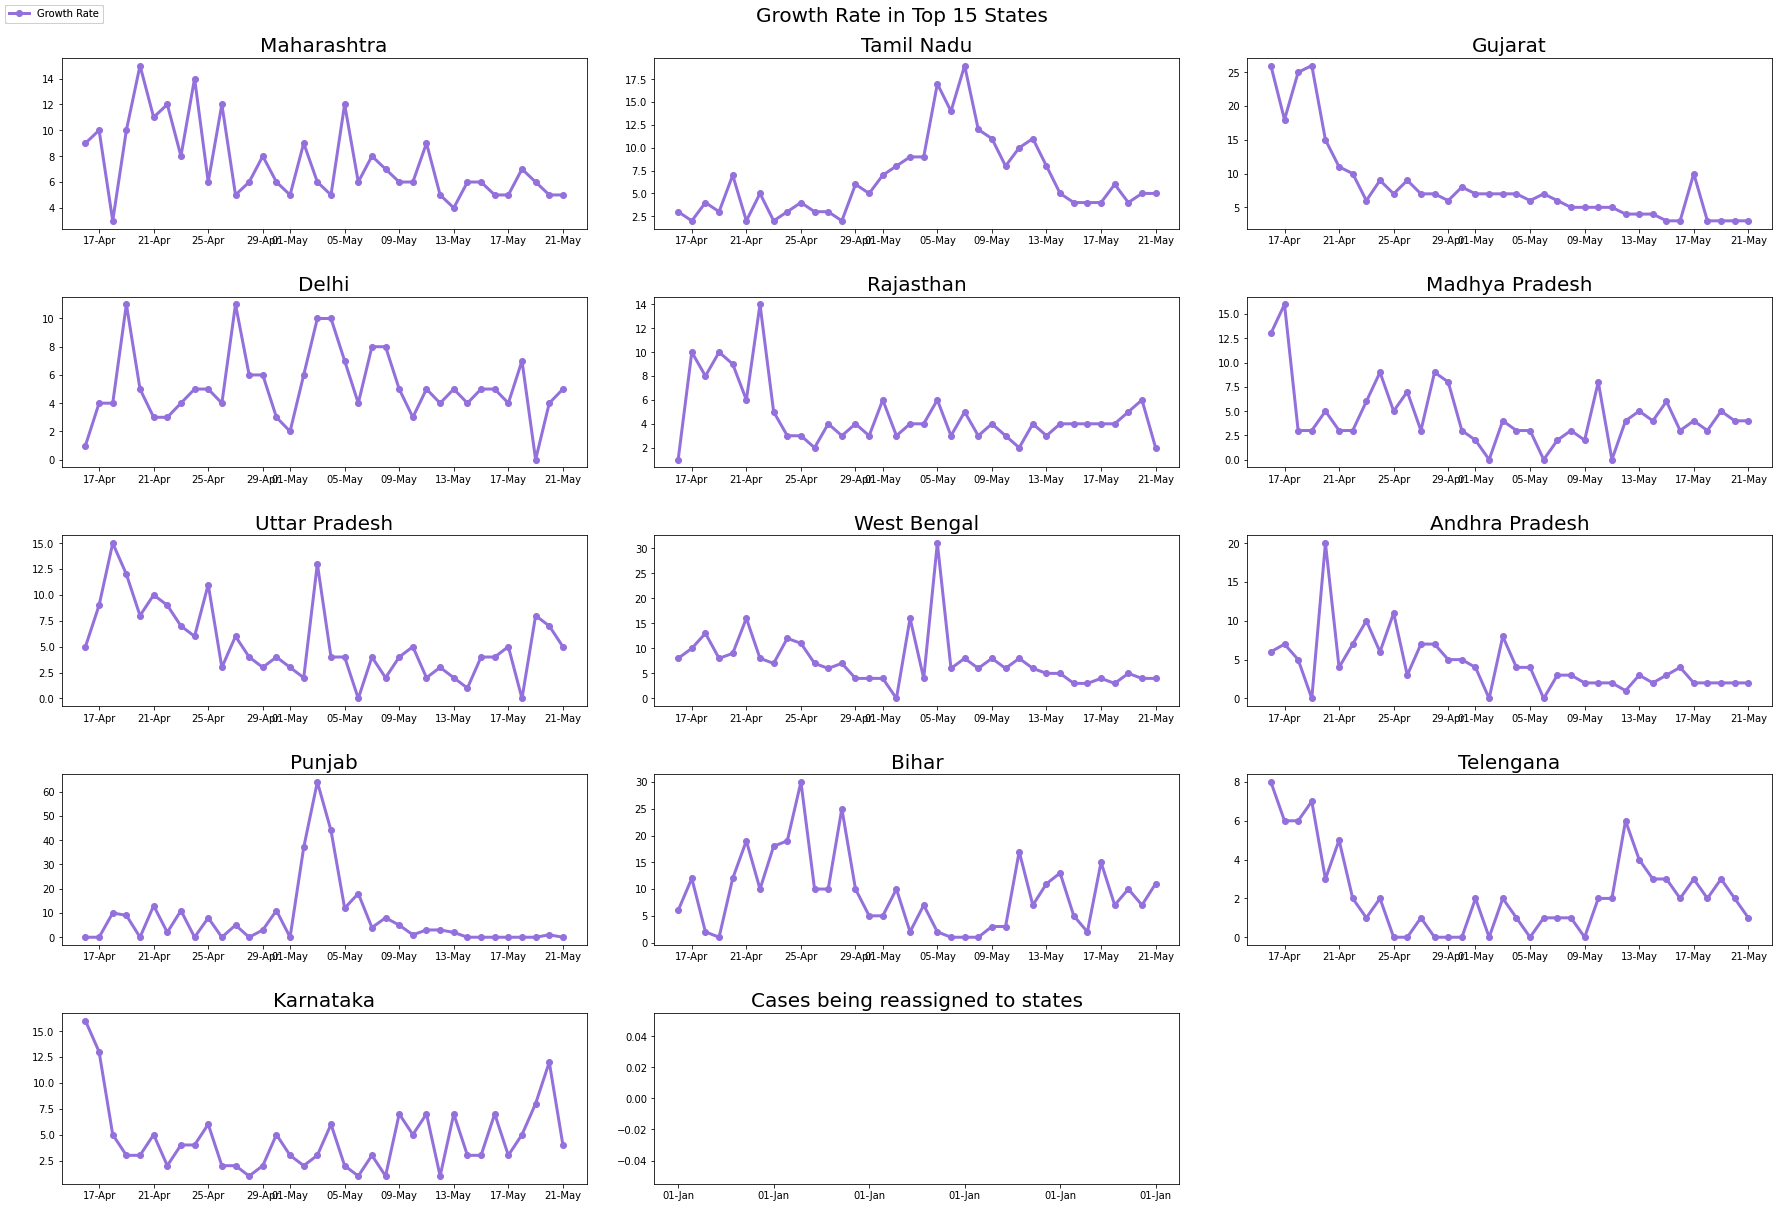

In [67]:
 def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k
 
fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

In [73]:
cols_object = list(hospital_beds.columns[2:8])
 
for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')
 
hospital_beds = hospital_beds.drop('Sno',axis=1)

In [74]:
 hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


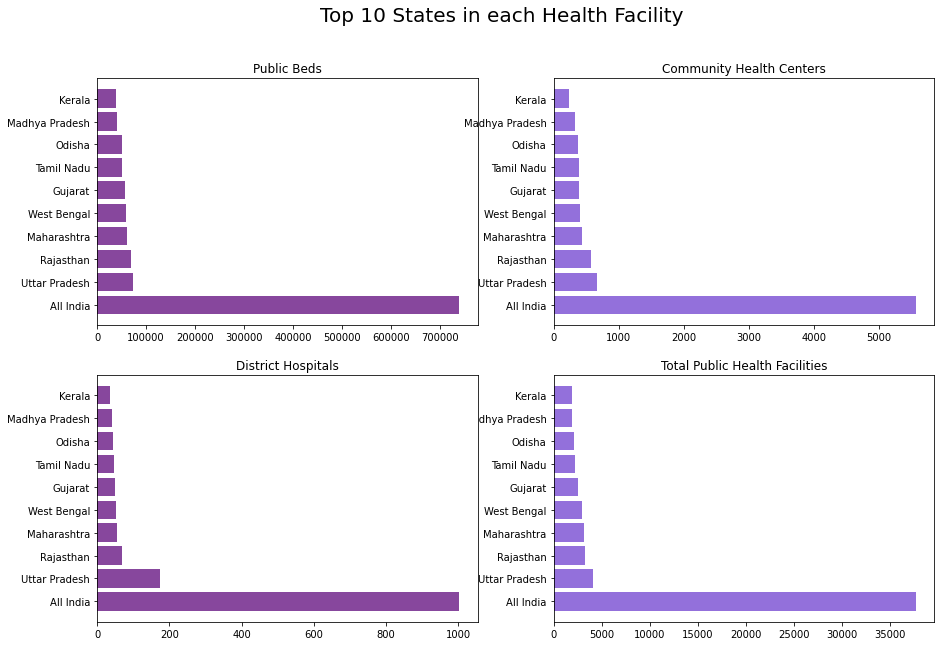

In [94]:
# top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')
 
plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
# plt.title('Primary Health Centers')
# plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');
 
plt.title('Public Beds')
plt.barh(top_10_community['State/UT'],top_10_public_beds['NumPublicBeds_HMIS'],color = '#87479d');
 
plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');
 
plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');
 
plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

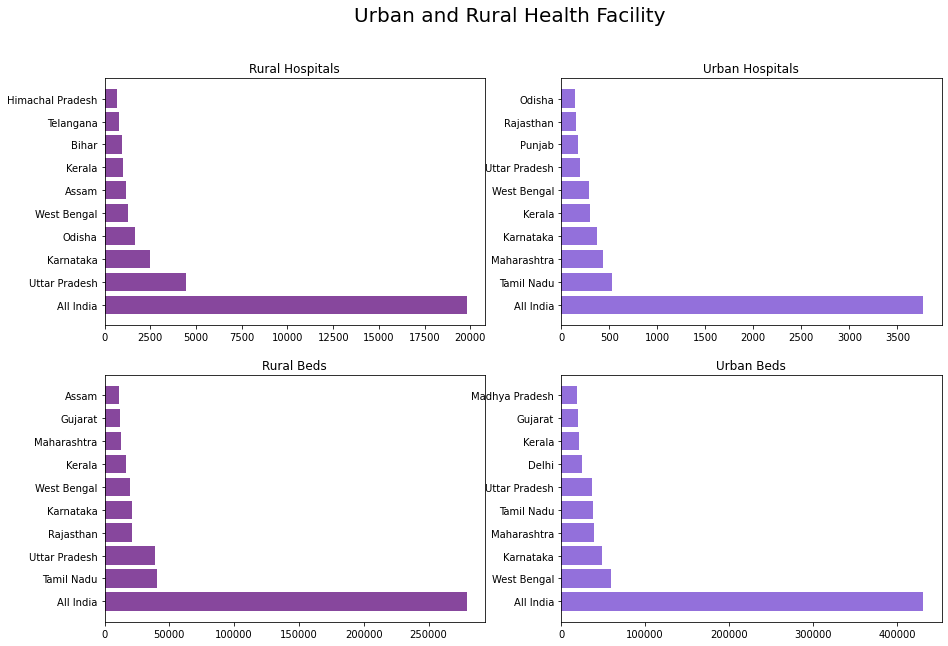

In [95]:
 top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')
 
plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');
 
plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');
 
plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');
 
plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

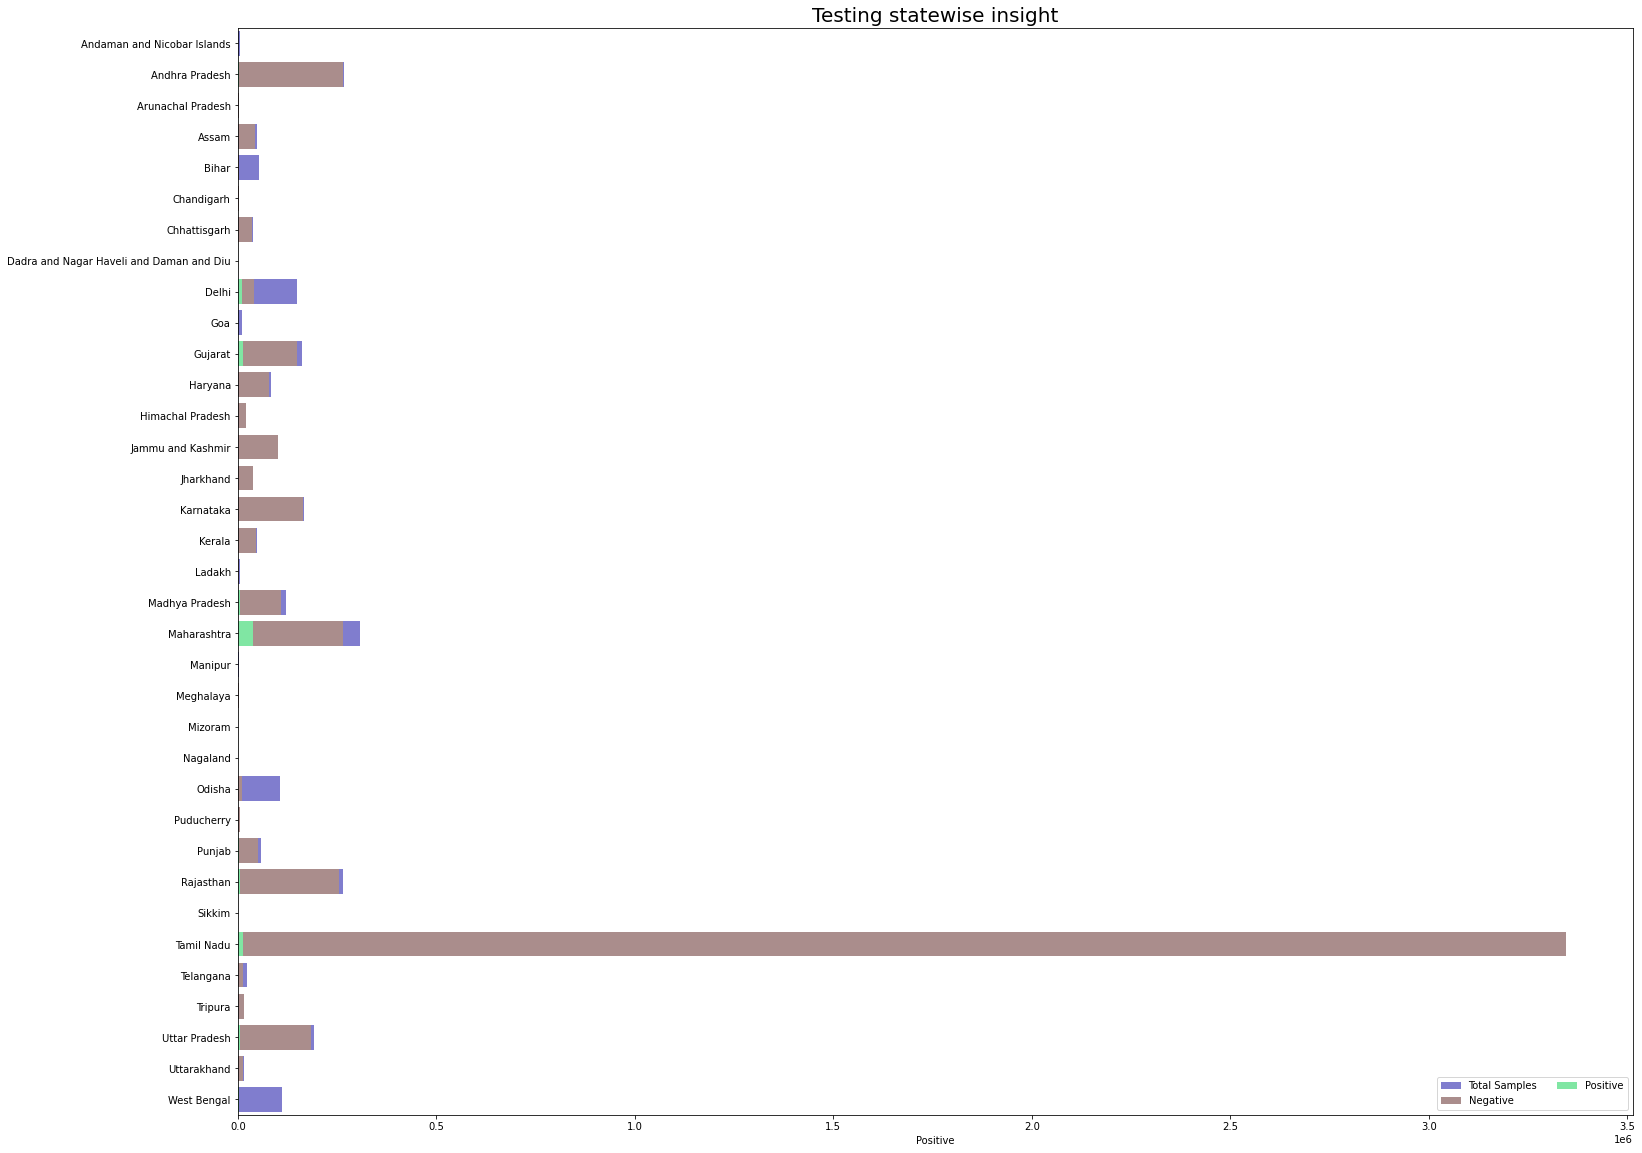

In [96]:
 state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names
 
plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

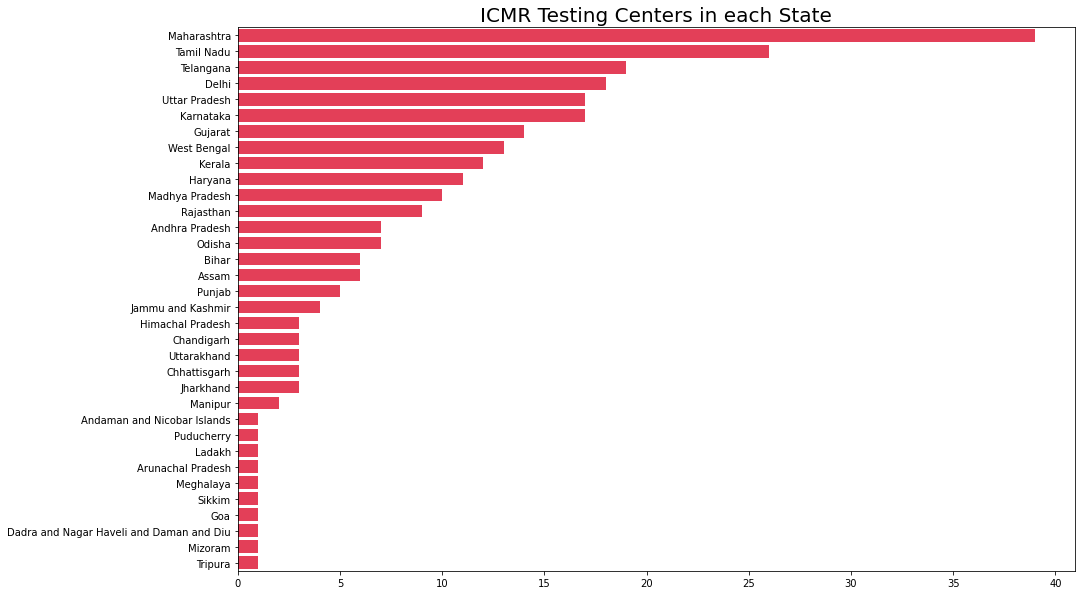

In [97]:
 values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)
 
plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

In [98]:
 train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [99]:
 !pip install Prophet

     |████████████████████████████████| 92kB 2.5MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=67abaf2bc8154771f4115b23a45a48d900a7aa046e0632b226ae27be067e30fc
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [104]:
 from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
 
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [112]:
 prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
162,2020-07-02
163,2020-07-03
164,2020-07-04
165,2020-07-05
166,2020-07-06
167,2020-07-07
168,2020-07-08
169,2020-07-09
170,2020-07-10
171,2020-07-11


In [113]:
 #predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
172,2020-07-12,697348.465834,676806.283826,717299.187707
173,2020-07-13,709726.647806,689719.511291,731008.762565
174,2020-07-14,722270.851262,700869.879691,745894.256600
175,2020-07-15,735025.375278,713089.599939,757874.253647
176,2020-07-16,745765.883205,721192.664452,769663.120464


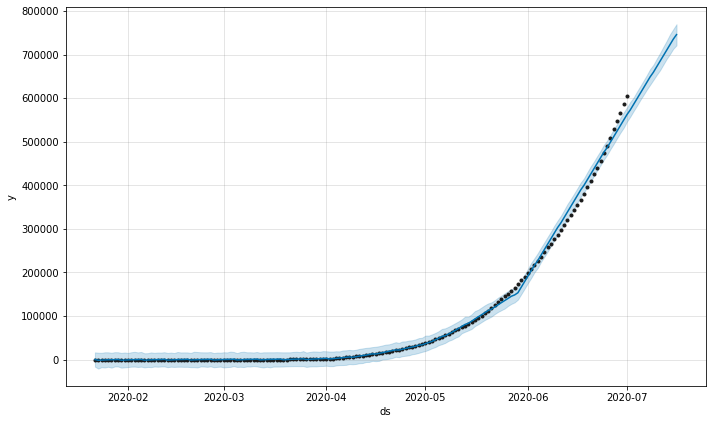

In [114]:
 confirmed_forecast_plot = prop.plot(forecast)

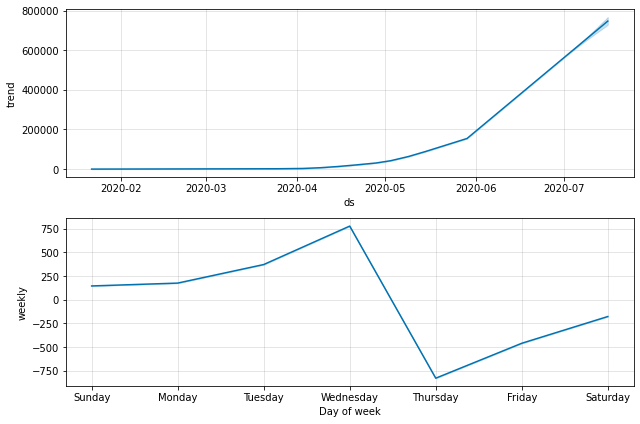

In [115]:
 confirmed_forecast_plot =prop.plot_components(forecast)

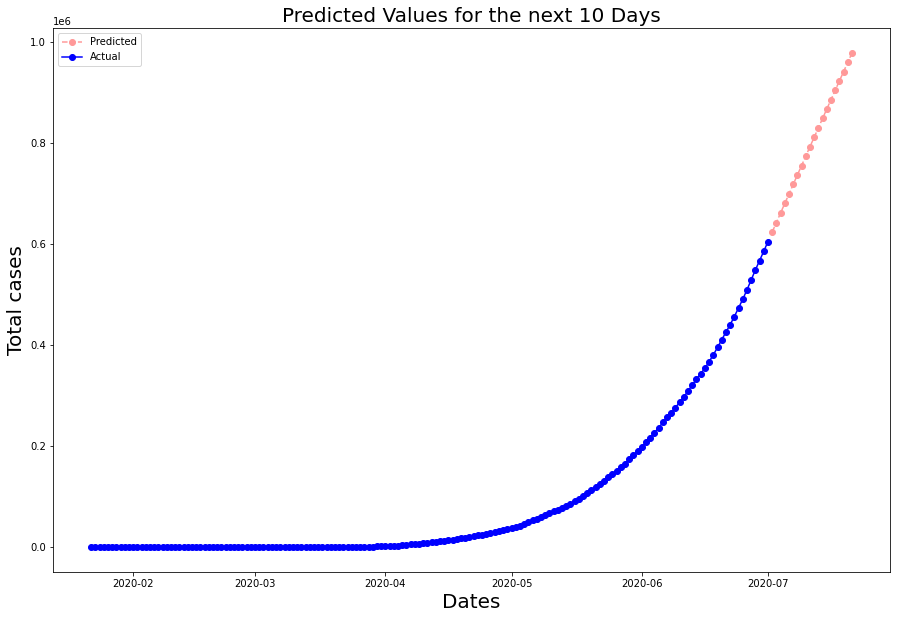

In [128]:
 from statsmodels.tsa.arima_model import ARIMA
 
from datetime import timedelta 
 
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 20)
pred = list(forecast[0])
 
start_date = data['ds'].max()
prediction_dates = []
for i in range(20):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 10 Days" , fontsize = 20)
 
plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [129]:
 # Learn how to use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
 
for lat, lon, value, name in zip(df_india['Latitude'], df_india['Longitude'], df_india['Confirmed'], df_india['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.002, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

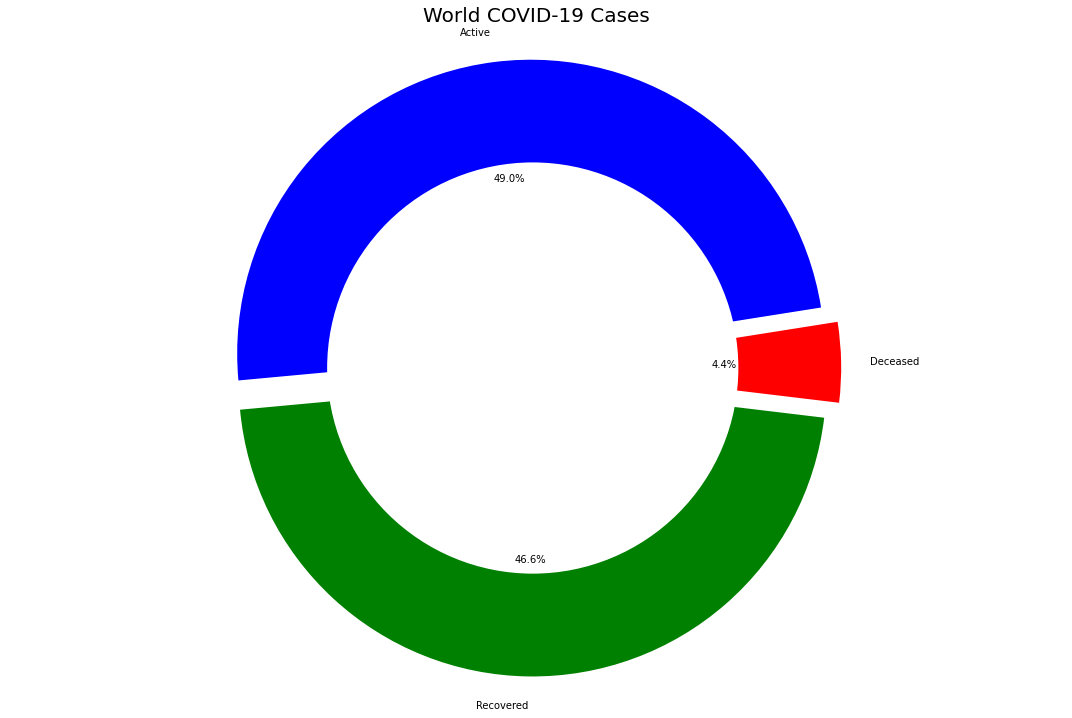

In [118]:
 world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)
 
labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []
 
for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')
 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [119]:
 dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

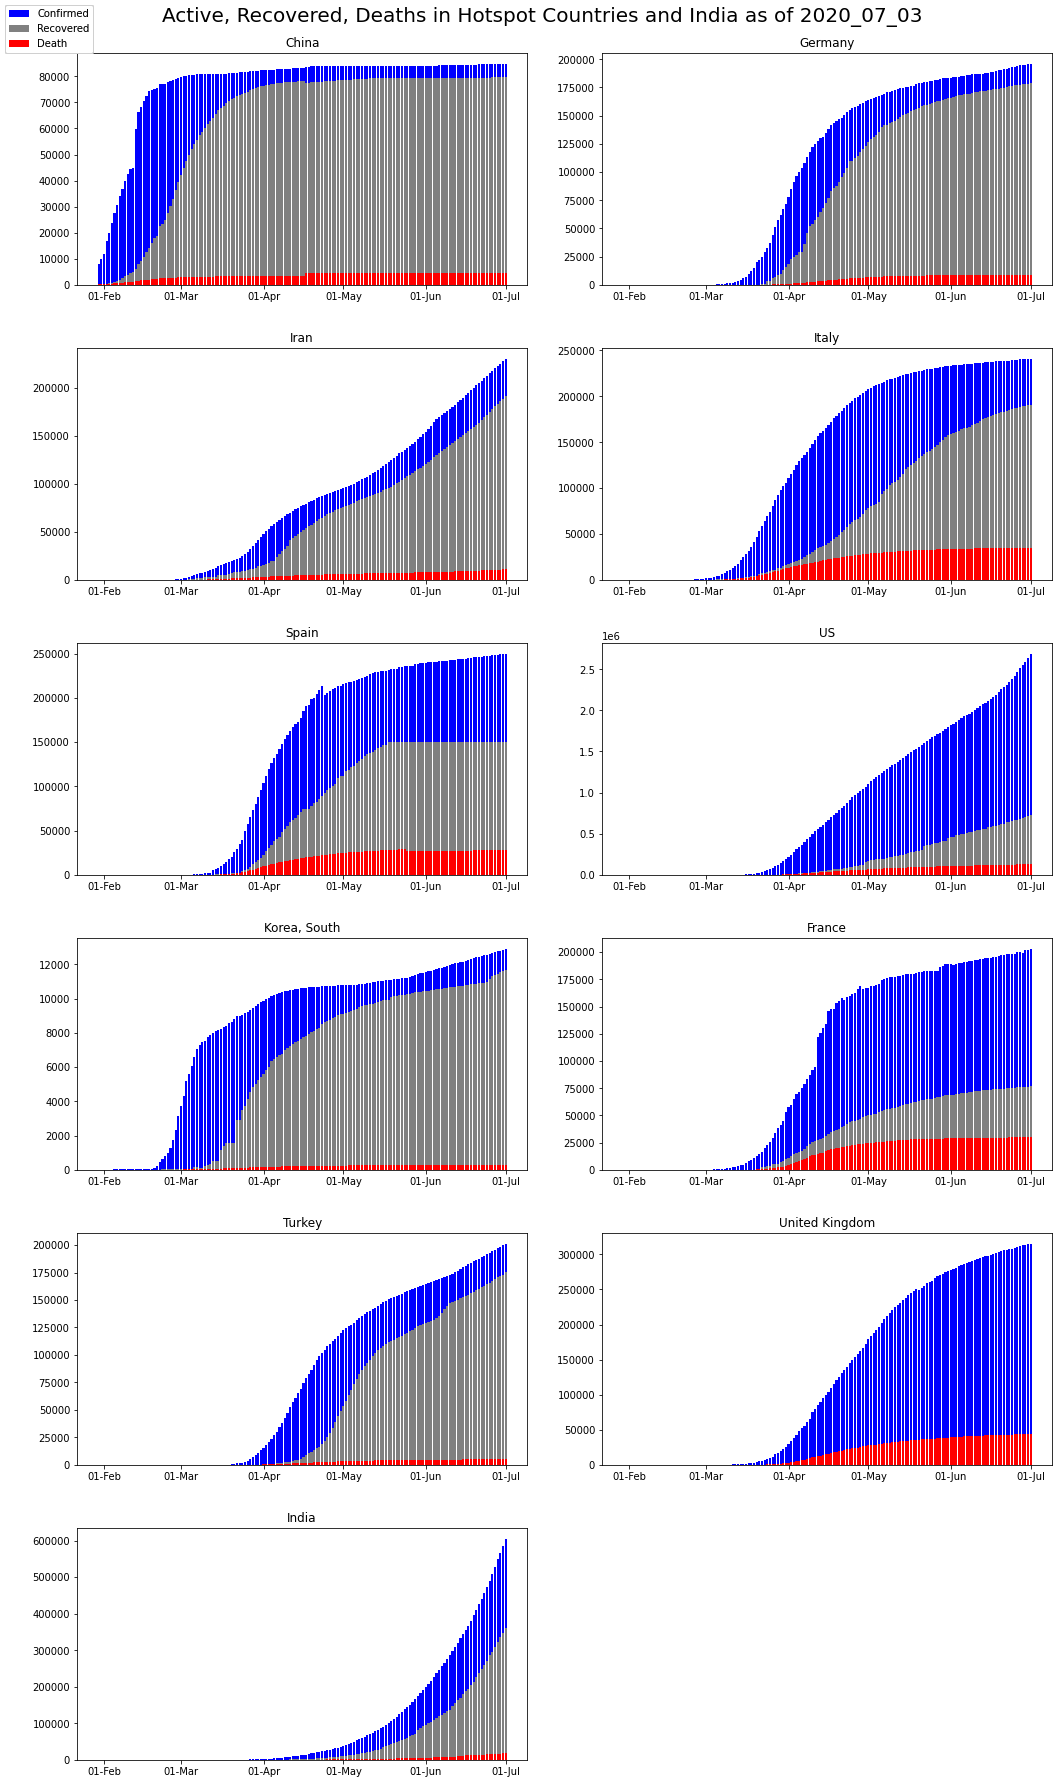

In [120]:
 hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
 
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()
 
global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}
 
for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]
 
    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]
 
    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
 
plt.tight_layout(pad=3.0)

In [122]:
 countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']
 
global_confirmed = []
global_recovered = []
global_deaths = []
 
for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 
 
    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 
 
    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])

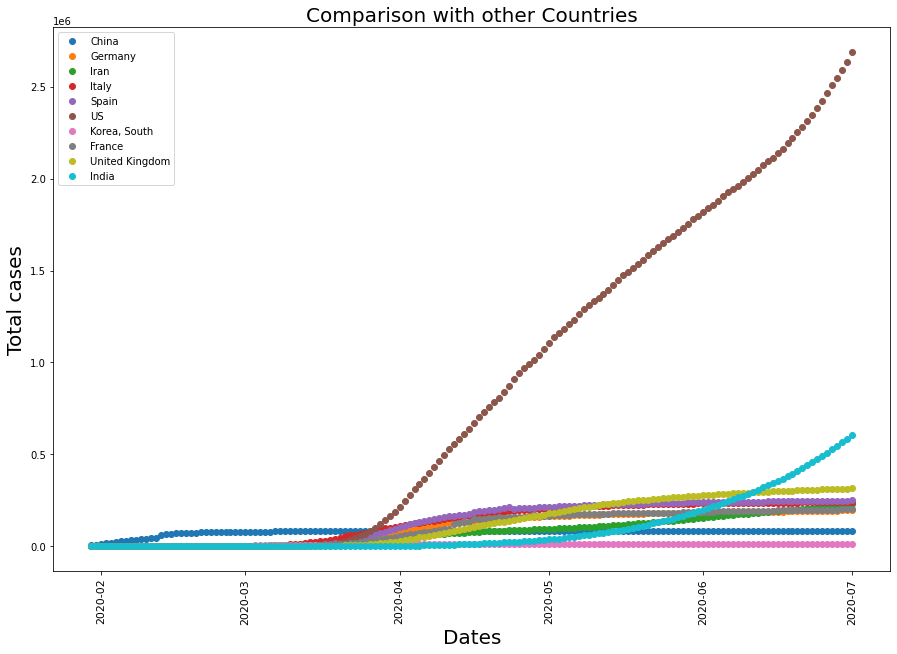

In [123]:
 plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)
 
for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

In [133]:
# Comparison of COVID - 19 in India with Iran
 
countries = ['Iran','India']
 
global_confirmed = []
global_recovered = []
global_deaths = []
 
for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 
 
    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 
 
    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])

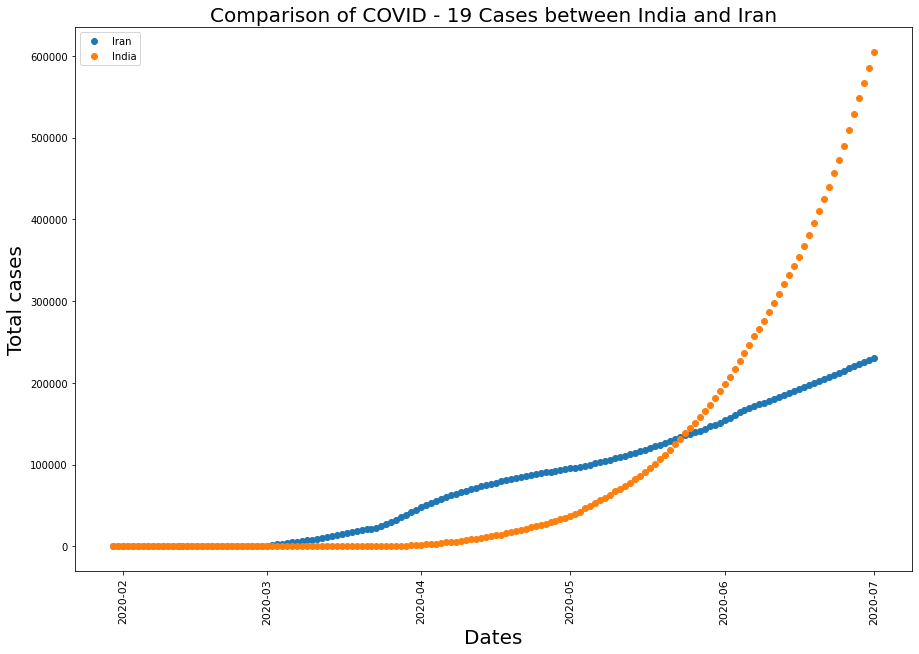

In [138]:
  plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison of COVID - 19 Cases between India and Iran" , fontsize = 20)
 
for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

The present situation of COVID-19 Cases between India and Iran:: > 
 
India has 229,401 Active Cases.
Iran  has 27,000  Active Cases.
 
The COVID-19 cases In India are drastically increasing as compared to Iran. Both countries have recovered up to 70% of its total cases.
 
We hope the cases can reduce by the lockdown.
 
# #StayHome and #StaySafe